In [1]:
import torch
from torch import nn
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1: Making directory and loading our data to it


In [2]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exist...skip downloading")
else:
  print(f"{image_path} directory does not exist...creating..")
  image_path.mkdir(parents=True , exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/meghna0122/Pytorch_Basics/raw/main/pizza_steak_sushi.zip")
  print("Downloading data")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip" , "r") as zip_ref:
  print("Unzipping data")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory does not exist...creating..
Unzipping data


In [3]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [5]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# Visualizing data with PIL library

random image pah :data/pizza_steak_sushi/test/pizza/3092704.jpg
 image class : pizza
 image height : 512
 image width : 512


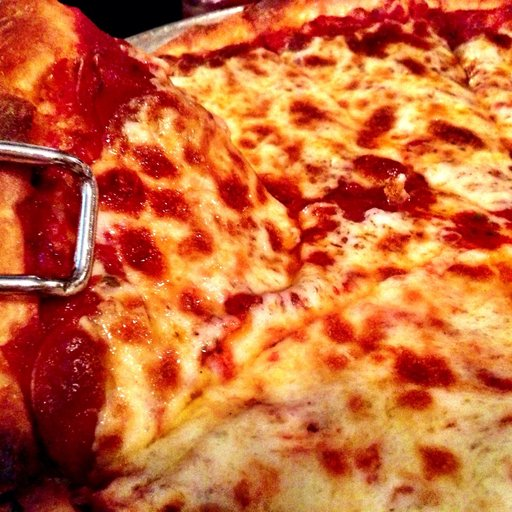

In [6]:
import random
from PIL import Image
random.seed(42)
#get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"random image pah :{random_image_path}")
print(f" image class : {image_class}")
print(f" image height : {img.height}")
print(f" image width : {img.width}")

img

# Visualizing data with matplotlib by converting img to numpy array

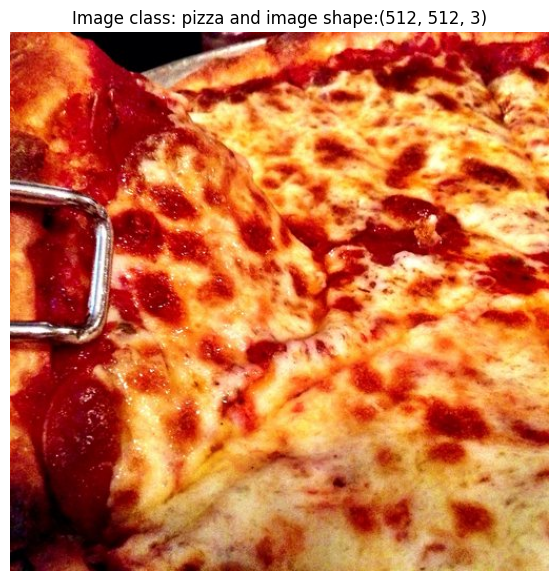

In [7]:
import numpy as np
import matplotlib.pyplot as plt
image_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} and image shape:{image_as_array.shape}")
plt.axis(False);

# Converting all images into tensors

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [9]:
# convert numpy array in range (0,255) to tensors in range (0.0 to 1.0)

data_transform  = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [10]:
data_transform(img)

tensor([[[0.8078, 0.9216, 0.9647,  ..., 0.8196, 0.7765, 0.6941],
         [0.7098, 0.8431, 0.8549,  ..., 0.8510, 0.7843, 0.7255],
         [0.7922, 0.8549, 0.8980,  ..., 0.7529, 0.7373, 0.7137],
         ...,
         [0.8980, 0.8745, 0.8353,  ..., 0.0706, 0.0588, 0.1059],
         [0.9137, 0.8706, 0.8392,  ..., 0.1216, 0.0353, 0.0392],
         [0.8980, 0.8745, 0.8431,  ..., 0.0824, 0.0980, 0.2235]],

        [[0.1412, 0.3647, 0.5804,  ..., 0.3020, 0.2471, 0.1804],
         [0.0431, 0.1333, 0.2196,  ..., 0.3961, 0.2941, 0.1922],
         [0.1176, 0.1216, 0.2353,  ..., 0.2118, 0.2314, 0.2235],
         ...,
         [0.7961, 0.7686, 0.7098,  ..., 0.0039, 0.0039, 0.0078],
         [0.8078, 0.7216, 0.6706,  ..., 0.0078, 0.0039, 0.0039],
         [0.7804, 0.7216, 0.6706,  ..., 0.0078, 0.0196, 0.0314]],

        [[0.1255, 0.2000, 0.2980,  ..., 0.1216, 0.1294, 0.0980],
         [0.0902, 0.1490, 0.1490,  ..., 0.1725, 0.1176, 0.0863],
         [0.0941, 0.1529, 0.1882,  ..., 0.1059, 0.1176, 0.

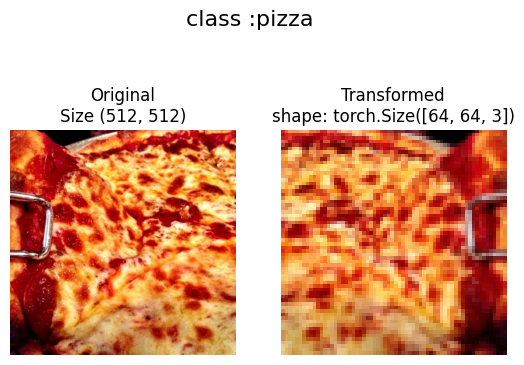

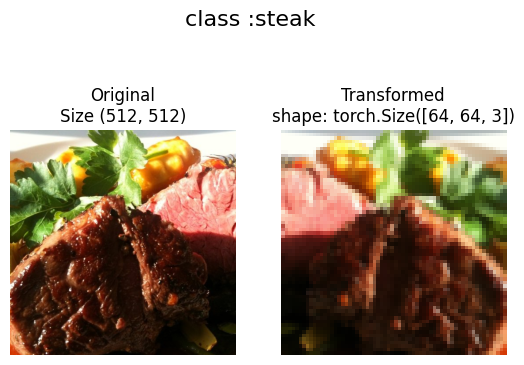

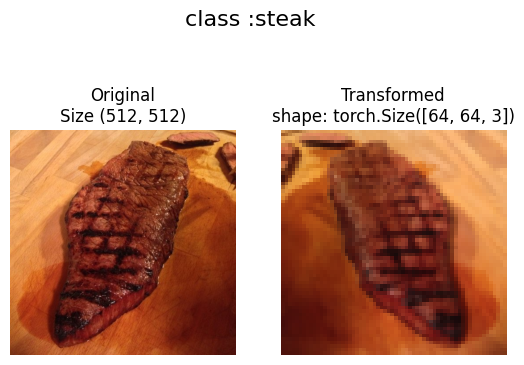

In [11]:
def plot_transformed_image(image_path:list , transform, n=3,seed=None):
  if seed:
    random.seed(seed)
  random_image_path = random.sample(image_path , k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize {f.size}")
      ax[0].axis(False)

      transformed_image= transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nshape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"class :{image_path.parent.stem}",fontsize=16)
plot_transformed_image(image_path =image_path_list, transform = data_transform,n=3,seed=42)


# Loading image data using image folder


In [12]:
from torchvision import datasets
train_data = datasets.ImageFolder(
    root=train_dir,
    transform = data_transform ,
    target_transform =None
)

test_data = datasets.ImageFolder(
    root= test_dir,
    transform =data_transform

)

class_names = train_data.classes
class_dict = train_data.class_to_idx


In [13]:
class_names

['pizza', 'steak', 'sushi']

In [14]:
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
img , label=train_data[0][0] , train_data[0][1]

In [16]:
img.shape

torch.Size([3, 64, 64])

In [17]:
label

0

Text(0.5, 1.0, 'pizza')

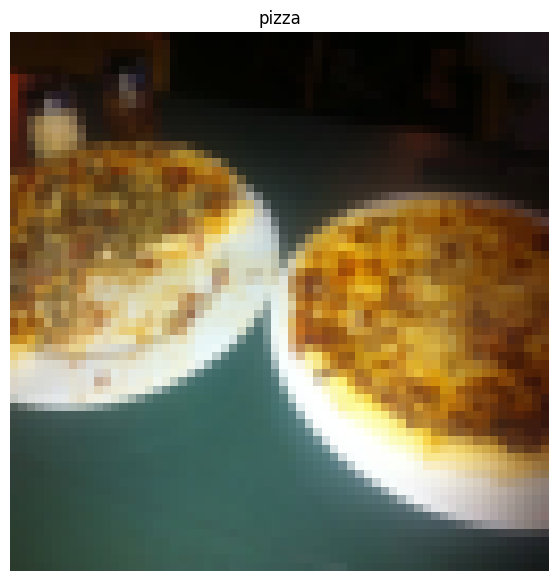

In [18]:
img_permute = img.permute(1,2,0)

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label])

# Turn Loaded image into DataLoader

In [19]:
from torch.utils.data import DataLoader

train_dataloader =DataLoader(
    dataset =train_data,
    batch_size=2,
    num_workers=1,
    shuffle =True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size =2,
    num_workers =1,
    shuffle = False
)

In [20]:
img, label = next(iter(train_dataloader))

In [21]:
img.shape

torch.Size([2, 3, 64, 64])

In [22]:
label

tensor([1, 0])

# Other form of transformation (Data Augumentation)

In [23]:
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins =31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
       transforms.ToTensor()
])

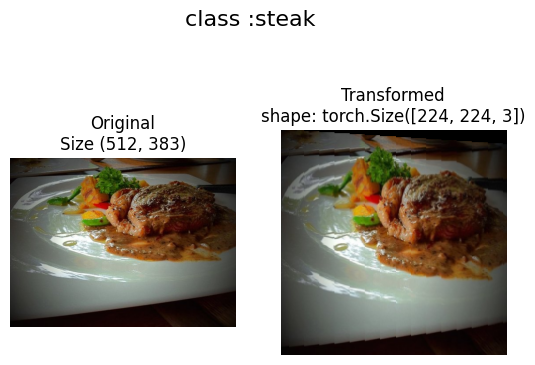

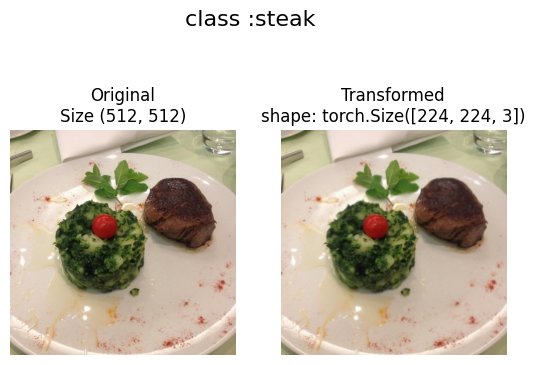

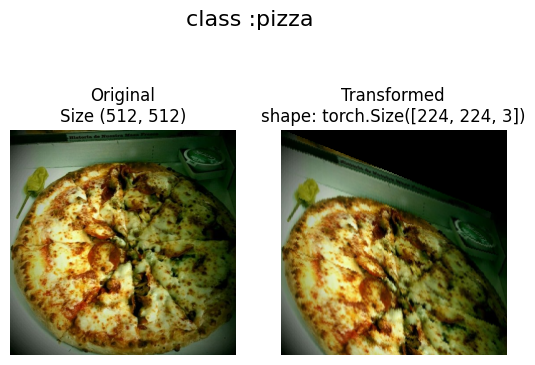

In [24]:
plot_transformed_image(image_path_list , train_transform, n=3,seed=None)

# Model 0 --> TinyVGG architecture without data augumentation


In [25]:
simple_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [26]:
# Load data and transform data
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                       transform =simple_transform)

# Convert data into DataLoader
import os
NUM_WORKERS= os.cpu_count()
train_dataloader_simple= DataLoader(batch_size=32,
                                    shuffle=True,
                                    dataset=train_data_simple,
                                    num_workers = NUM_WORKERS )
test_dataloader_simple = DataLoader(batch_size=32,
                                    shuffle=False,
                                    dataset=test_data_simple,
                                    num_workers=NUM_WORKERS)



In [27]:
class TinyVGG(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),   #[1, 10, 16, 16] --> [1,10*16*16]
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    # print(x.shape)
    x=self.conv_block_2(x)
    # print(x.shape)
    x=self.classifier(x)
    return x;


In [28]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,hidden_units=10,output_shape=len(train_data.classes))

In [29]:

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [30]:
img_batch , label_batch = next(iter(train_dataloader_simple))

In [31]:
img_batch.shape

torch.Size([32, 3, 64, 64])

In [32]:
img_single , label_single = img_batch[0].unsqueeze(dim=0) , label_batch[0]
img_single.shape

torch.Size([1, 3, 64, 64])

In [33]:
model_0.eval()
with torch.inference_mode():
  pred = model_0(img_single)

print(f"output logits:{pred}")
print(f"output prediction probability: {torch.softmax(pred,dim=1)}")
print(f"output prediction label: {torch.argmax(torch.softmax(pred,dim=1))}")
print(f"output prediction label: {class_names[torch.argmax(torch.softmax(pred,dim=1))]}")
print(f"actual label: {label_single}")
print(f"actual label: {class_names[label_single]}")




output logits:tensor([[0.0578, 0.0634, 0.0351]])
output prediction probability: tensor([[0.3352, 0.3371, 0.3277]])
output prediction label: 1
output prediction label: steak
actual label: 2
actual label: sushi


In [34]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [35]:
loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.1)

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
def train_step(
    model: torch.nn.Module,
    data_loader : torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device :torch.device=device):
  train_loss=0
  train_acc=0
  model.to(device)
  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device) , y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+= accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss : {train_loss} | Train accuracy : {train_acc}")
  return train_loss,train_acc

def test_step(
    model:torch.nn.Module,
    data_loader : torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    accuracy_fn,
    device :torch.device=device):
    test_acc =0
    test_loss=0;
    model.to(device)
    model.eval()
    with torch.inference_mode():
      for X,y in data_loader:
        X,y = X.to(device) , y.to(device)
        test_pred = model(X)
        loss= loss_fn(test_pred, y)
        test_loss+=loss
        test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
      test_loss/=len(data_loader)
      test_acc/=len(data_loader)

      print(f" Test loss: {test_loss} | Test_accuracy : {test_acc}")
      return test_loss, test_acc







In [37]:

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [38]:
from tqdm.auto import tqdm
epochs =5
results={
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
}
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n----")
  train_loss , train_acc =train_step(model=model_0,
             data_loader = train_dataloader_simple,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_loss,test_acc=test_step(
      model=model_0,
             data_loader = test_dataloader_simple,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0
----
Train loss : 19.70493507385254 | Train accuracy : 31.25
 Test loss: 1.212847113609314 | Test_accuracy : 19.791666666666668
Epoch : 1
----
Train loss : 1.078420877456665 | Train accuracy : 46.09375
 Test loss: 1.1783860921859741 | Test_accuracy : 26.041666666666668
Epoch : 2
----
Train loss : 1.146987795829773 | Train accuracy : 30.46875
 Test loss: 1.1557495594024658 | Test_accuracy : 26.041666666666668
Epoch : 3
----
Train loss : 1.1026217937469482 | Train accuracy : 42.96875
 Test loss: 1.1414976119995117 | Test_accuracy : 19.791666666666668
Epoch : 4
----
Train loss : 1.123386263847351 | Train accuracy : 29.296875
 Test loss: 1.1566118001937866 | Test_accuracy : 19.791666666666668


In [39]:
results

{'train_loss': [tensor(19.7049, grad_fn=<DivBackward0>),
  tensor(1.0784, grad_fn=<DivBackward0>),
  tensor(1.1470, grad_fn=<DivBackward0>),
  tensor(1.1026, grad_fn=<DivBackward0>),
  tensor(1.1234, grad_fn=<DivBackward0>)],
 'train_acc': [31.25, 46.09375, 30.46875, 42.96875, 29.296875],
 'test_loss': [tensor(1.2128),
  tensor(1.1784),
  tensor(1.1557),
  tensor(1.1415),
  tensor(1.1566)],
 'test_acc': [19.791666666666668,
  26.041666666666668,
  26.041666666666668,
  19.791666666666668,
  19.791666666666668]}

In [40]:
import matplotlib.pyplot as plt
import torch

def plot_loss_curves(results: dict[str, list]):
    train_loss = [value.detach().numpy() for value in results['train_loss']]
    test_loss = [value.detach().numpy() for value in results['test_loss']]
    train_acc = results['train_acc']
    test_acc = results['test_acc']

    epochs = range(len(train_loss))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='train_accuracy')
    plt.plot(epochs, test_acc, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()




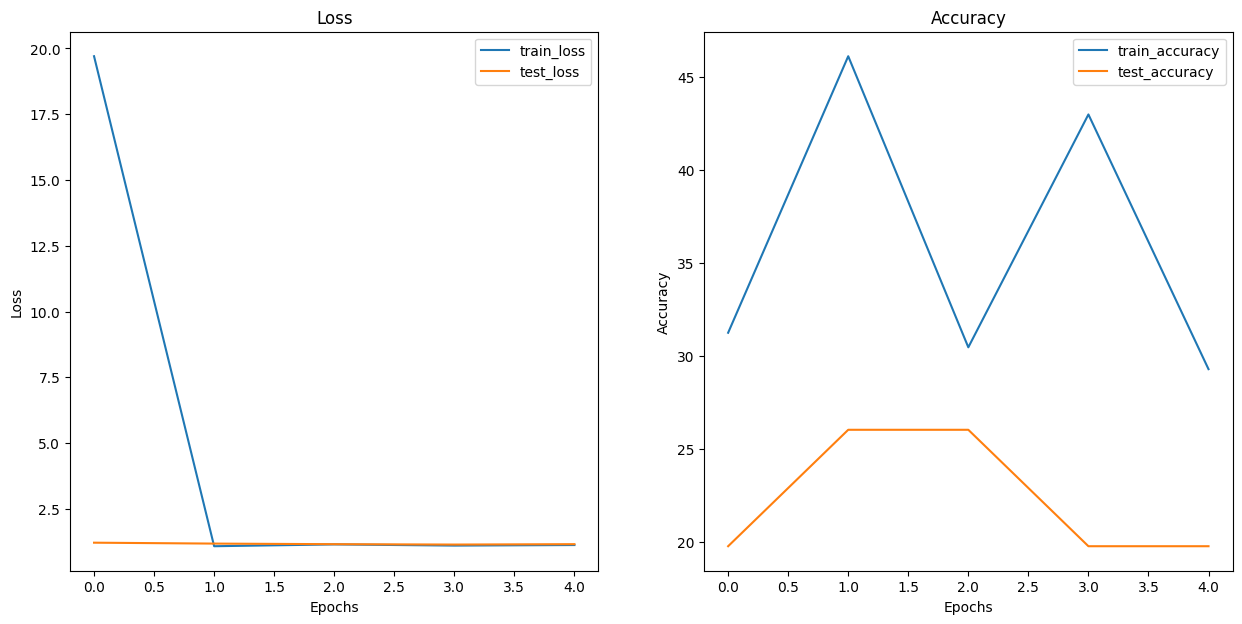

In [41]:
plot_loss_curves(results)

# Model 1 --> TinyVGG with data augumentaion

In [42]:
from torchvision import transforms
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins =31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
       transforms.ToTensor()
])

In [43]:
#Data load and tranform data

train_data_augument = datasets.ImageFolder (
    root=train_dir,
    transform=train_transform_trivial_augment
)

test_data_simple=datasets.ImageFolder(
    root=test_dir,
    transform=test_transform
)

In [44]:
# data to DataLoader
train_dataloader_augument = DataLoader(dataset= train_data_augument,
                                       batch_size=32,
                                       shuffle=True,
                                       num_workers=os.cpu_count())

test_dataloader_augument = DataLoader(dataset=test_data_simple,
                                      batch_size=32,
                                      shuffle=False,
                                      num_workers = os.cpu_count())

In [45]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augument.classes))
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [46]:
torch.manual_seed(42)
from tqdm.auto import tqdm
epochs =5
results_augumented={
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
}
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n----")
  train_loss , train_acc =train_step(model=model_1,
             data_loader = train_dataloader_augument,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_loss,test_acc=test_step(
      model=model_1,
             data_loader = test_dataloader_augument,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
  results_augumented["train_loss"].append(train_loss)
  results_augumented["train_acc"].append(train_acc)
  results_augumented["test_loss"].append(test_loss)
  results_augumented["test_acc"].append(test_acc)




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0
----
Train loss : 1.0977905988693237 | Train accuracy : 26.953125
 Test loss: 1.1037269830703735 | Test_accuracy : 20.833333333333332
Epoch : 1
----
Train loss : 1.097580075263977 | Train accuracy : 38.28125
 Test loss: 1.1037269830703735 | Test_accuracy : 20.833333333333332
Epoch : 2
----
Train loss : 1.097071886062622 | Train accuracy : 38.671875
 Test loss: 1.1037269830703735 | Test_accuracy : 20.833333333333332
Epoch : 3
----
Train loss : 1.0974617004394531 | Train accuracy : 28.125
 Test loss: 1.1037269830703735 | Test_accuracy : 20.833333333333332
Epoch : 4
----
Train loss : 1.0974169969558716 | Train accuracy : 38.28125
 Test loss: 1.1037269830703735 | Test_accuracy : 20.833333333333332


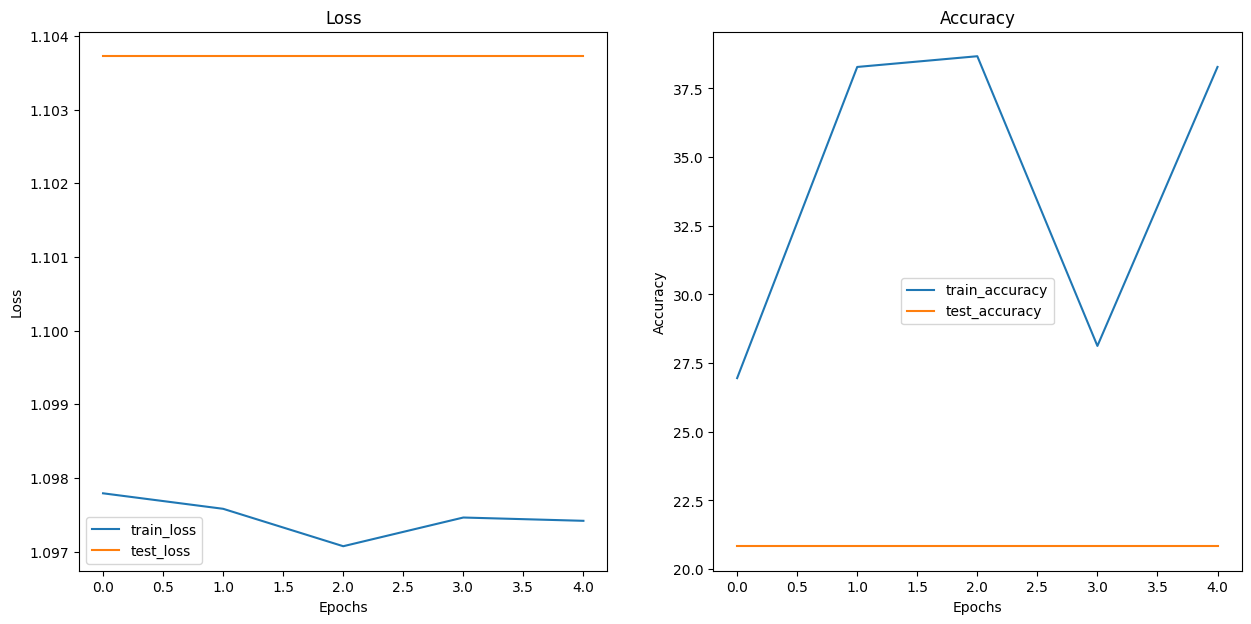

In [48]:
plot_loss_curves(results_augumented)

In [61]:
import numpy as np

def convert_to_numpy(results):
    results_numpy = {}
    for key, values in results.items():
        if isinstance(values[0], float):
            results_numpy[key] = np.array(values)
        else:
            results_numpy[key] = np.array([value.item() for value in values])
    return results_numpy




In [63]:

converted_results = convert_to_numpy(results)

converted_results_augumented = convert_to_numpy(results_augumented)

In [66]:
import pandas as pd

model_0_df = pd.DataFrame(converted_results)
model_1_df = pd.DataFrame(converted_results_augumented)


In [67]:
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,19.704935,31.250000,1.212847,19.791667
1,1.078421,46.093750,1.178386,26.041667
2,1.146988,30.468750,1.155750,26.041667
3,1.102622,42.968750,1.141498,19.791667
4,1.123386,29.296875,1.156612,19.791667


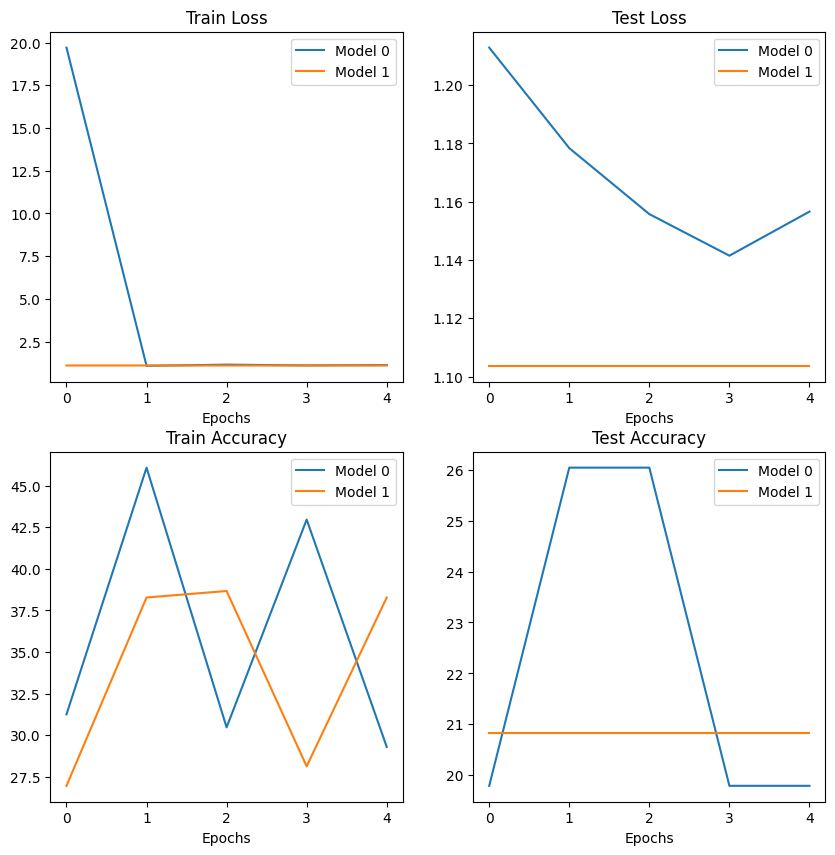

In [69]:
# Setup a plot
plt.figure(figsize=(10, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

# Make a prediction on a custom image

In [71]:
import requests
custom_image_path = data_path / "pizza.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:

        request = requests.get("https://github.com/meghna0122/Pytorch_Basics/blob/main/pizza.jpg?raw=true")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path}")

(-0.5, 539.5, 359.5, -0.5)

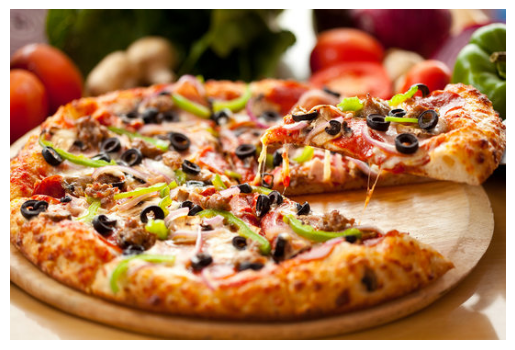

In [76]:
# our model is trained on:
#in tensor form with datatype (torch.float32)
#of shape 64*64*3
#on right device

import torchvision
custom_image_unit8=torchvision.io.read_image(str(custom_image_path))
plt.imshow(custom_image_unit8.permute(1,2,0))
plt.axis("off")

In [ ]:
custom_image_tranform=tranforms.Compose([
     transforms.Resize((64, 64)),
])

In [102]:
def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        transform=None):
  custom_image= torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
  if transform:
        custom_image = transform(custom_image)
  model.eval()
  with torch.inference_mode():
    custom_image_pred = model(custom_image.unsqueeze(dim=0))
  custom_image_pred_prob = torch.softmax(custom_image_pred,dim=1)
  custom_image_pred_label = torch.argmax(custom_image_pred_prob)
  plt.imshow(custom_image.squeeze().permute(1,2,0))
  title=f"predicted label : {class_names[custom_image_pred_label]}"
  plt.title(title)
  plt.axis(False)





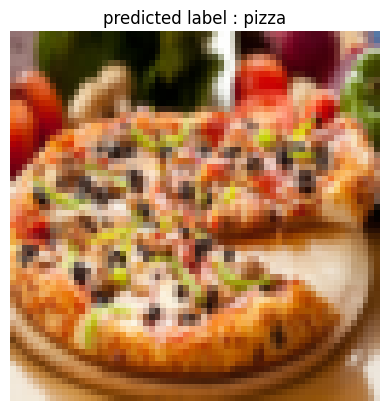

In [107]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,

                    transform=custom_image_tranform ,
                    )